In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r"C:\Users\amang\Downloads\Customer_retention_dataset-\Customer_retention_dataset\Customer_retention_dataset.xlsx", sheet_name="datasheet")
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [3]:
df.columns.values

array(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [4]:
df.columns=df.columns.str.replace("\d","")    #replace digits
df.columns.values

array(['Gender of respondent', ' How old are you? ',
       ' Which city do you shop online from?',
       ' What is the Pin Code of where you shop online from?',
       ' Since How Long You are Shopping Online ?',
       ' How many times you have made an online purchase in the past  year?',
       ' How do you access the internet while shopping on-line?',
       ' Which device do you use to access the online shopping?',
       ' What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       ' What is the operating system (OS) of your device?\t\t\t\t                                          ',
       ' What browser do you run on your device to access the website?\t\t\t                                                          ',
       ' Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       ' After first visit, how do you reach the o

In [5]:
df.columns=df.columns.str.replace("\t",'')    #REMOVE \t FROM columns
df.columns.values

array(['Gender of respondent', ' How old are you? ',
       ' Which city do you shop online from?',
       ' What is the Pin Code of where you shop online from?',
       ' Since How Long You are Shopping Online ?',
       ' How many times you have made an online purchase in the past  year?',
       ' How do you access the internet while shopping on-line?',
       ' Which device do you use to access the online shopping?',
       ' What is the screen size of your mobile device?                                        ',
       ' What is the operating system (OS) of your device?                                          ',
       ' What browser do you run on your device to access the website?                                                          ',
       ' Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       ' After first visit, how do you reach the online retail store?       

In [6]:
[x for x in df.columns if x.endswith(" ")]    #check for columns with spaces

[' How old are you? ',
 ' What is the screen size of your mobile device?                                        ',
 ' What is the operating system (OS) of your device?                                          ',
 ' What browser do you run on your device to access the website?                                                          ',
 ' Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
 ' After first visit, how do you reach the online retail store?                                                   ',
 ' How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
 ' What is your preferred payment Option?                                                                                                                               ',
 ' How frequently do you abandon (selecting an items and l

In [7]:
df.columns= df.columns.str.strip()    #remove spaces at the start and end of columns
df.columns.values

array(['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?',
       'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving without mak

In [8]:
[x for x in df.columns if x.endswith(" ")]    #check for columns with spaces

[]

No column with extra spaces left.

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.columns.values

array(['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?',
       'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving without mak

In [11]:
li=['How old are you?','Which city do you shop online from?','What is the Pin Code of where you shop online from?',
   'Since How Long You are Shopping Online ?','How many times you have made an online purchase in the past  year?',
   'How do you access the internet while shopping on-line?']

for i in li:
    print ("Column- ", i)
    print(df[i].unique(),'\n')

Column-  How old are you?
['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above'] 

Column-  Which city do you shop online from?
['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr'] 

Column-  What is the Pin Code of where you shop online from?
[110009 110030 201308 132001 530068 110011 110018 173229 110039 244001
 122018 201310 560037 203207 250001 201005 110044 201306 560010 201305
 110042 132036 560018 110008 560002 201303 201312 203202 560001 201304
 560003 110014 560013 173212 122009 201009 201008 201001 203001] 

Column-  Since How Long You are Shopping Online ?
['Above 4 years' '3-4 years' '2-3 years' 'Less than 1 year' '1-2 years'] 

Column-  How many times you have made an online purchase in the past  year?
['31-40 times' '41 times and above' 'Less than 10 times' '11-20 times'
 '21-30 times' '42 times and above'] 

Column-  How do you access the internet while shopping on-line

we can see that in column "How many times you have made an online purchase in the past  year?" we can see 2 values that we can combine in one

In [12]:
c=0
for i in df["How many times you have made an online purchase in the past  year?"]:
    if ( i == '41 times and above'):
        print(i)

41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above
41 times and above


In [13]:
c=0
for i in df["How many times you have made an online purchase in the past  year?"]:
    if ( i == '42 times and above'):
        df["How many times you have made an online purchase in the past  year?"][c]='41 times and above'
    c+=1

In [14]:
c=0
for i in df["How do you access the internet while shopping on-line?"]:
    if ( i == 'Mobile internet'):
        df["How do you access the internet while shopping on-line?"][c]='Mobile Internet'
    c+=1

In [15]:
print(df["How many times you have made an online purchase in the past  year?"].unique())
print(df['How do you access the internet while shopping on-line?'].unique())

['31-40 times' '41 times and above' 'Less than 10 times' '11-20 times'
 '21-30 times']
['Dial-up' 'Wi-Fi' 'Mobile Internet']


In [16]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
264     True
265     True
266     True
267     True
268     True
Length: 269, dtype: bool

Duplicate datas are present in the DataFrame

In [17]:
df.drop_duplicates(inplace=True)
df

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Female,41-50 yaers,Ghaziabad,201009,2-3 years,31-40 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
106,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
107,Female,Less than 20 years,Ghaziabad,201001,Less than 1 year,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Window/windows Mobile,...,Amazon.in,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
112,Male,31-40 years,Bulandshahr,203001,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5 inches,Android,...,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com",Flipkart.com,Flipkart.com,Flipkart.com,"Amazon.in, Flipkart.com",Flipkart.com,Flipkart.com,Amazon.in


In [18]:
df=df.reset_index()

In [19]:
'''plt.figure(figsize=(5,5))
df['Gender of respondent'].value_counts().plot.pie(autopct='%.1f%%',wedgeprops = {"edgecolor" : "black",'linewidth':1.5})
plt.xlabel("Gender of respondent")
plt.ylabel("")
plt.show()'''

'plt.figure(figsize=(5,5))\ndf[\'Gender of respondent\'].value_counts().plot.pie(autopct=\'%.1f%%\',wedgeprops = {"edgecolor" : "black",\'linewidth\':1.5})\nplt.xlabel("Gender of respondent")\nplt.ylabel("")\nplt.show()'

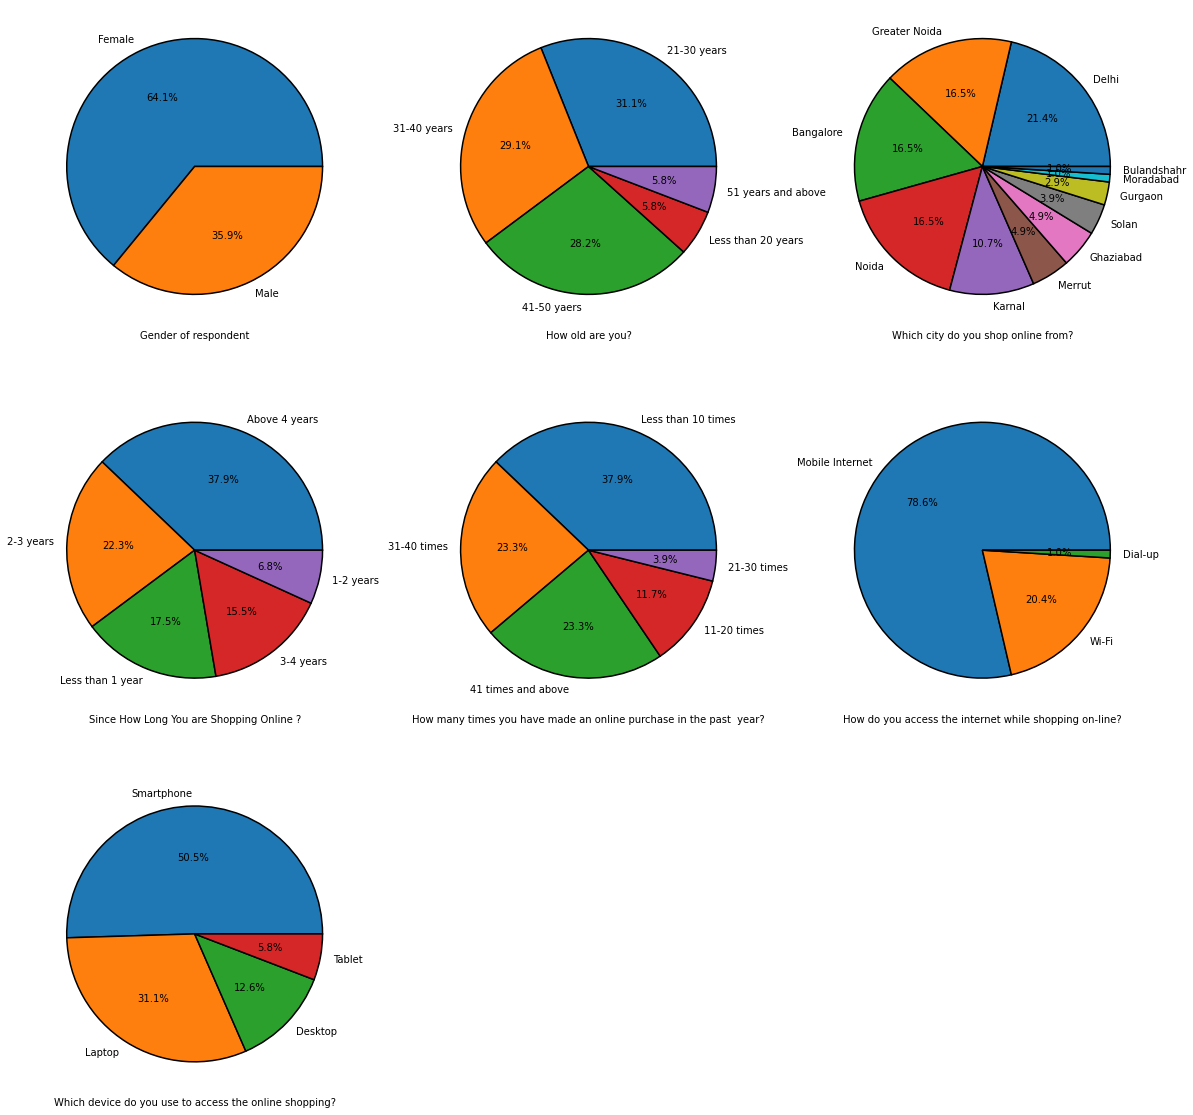

In [35]:
plt.figure(figsize=(20,20))
#ax,fig= plt.subplot()
col=df.columns.values
c=1
for i in range (1,9):
    if i==4:
        continue
    plt.subplot(3,3,c)
    df[col[i]].value_counts().plot.pie(autopct='%.1f%%', wedgeprops={"edgecolor" : "black",'linewidth':1.5})
    plt.xlabel(col[i])
    plt.ylabel("")
    c+=1

There are twice no of females than males who did the shopping.

Teenagers accounts for only 5.8%.

Most of the people are shopping online since a long time but 36.9% of people shop for less than 10 times a year.

Delhi, Noida, Greater Noida and Banglore people account fot more than 70%.

<AxesSubplot:xlabel='How many times you have made an online purchase in the past  year?', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

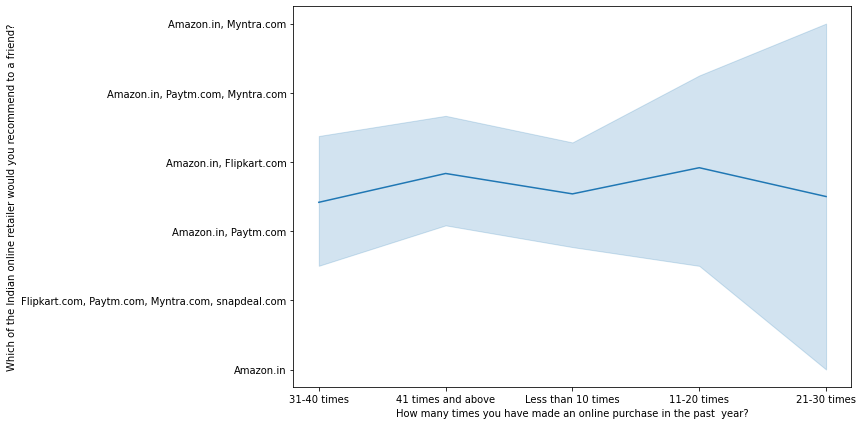

In [21]:
fig,ax= plt.subplots(figsize=(10,7))
sns.lineplot(df['How many times you have made an online purchase in the past  year?'],df['Which of the Indian online retailer would you recommend to a friend?'])

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

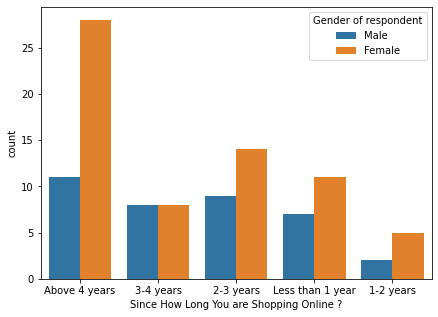

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(df['Since How Long You are Shopping Online ?'],hue=df['Gender of respondent'])

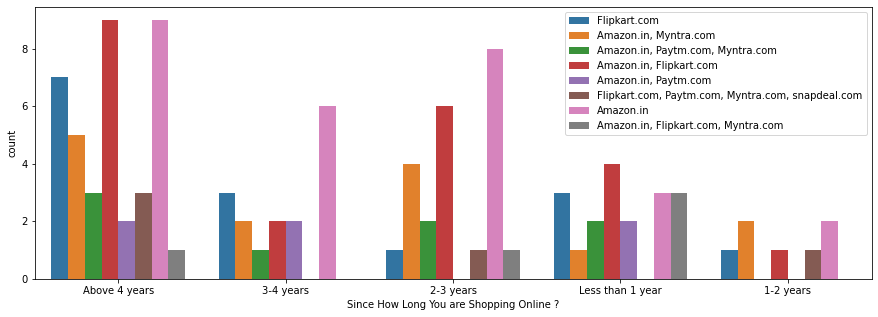

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(df['Since How Long You are Shopping Online ?'],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
plt.legend(loc='upper right')

Those who are shopping since a long time (4 years or more) tends to prefer Amazon. Infact on an average, people trust amazon and flipkart.

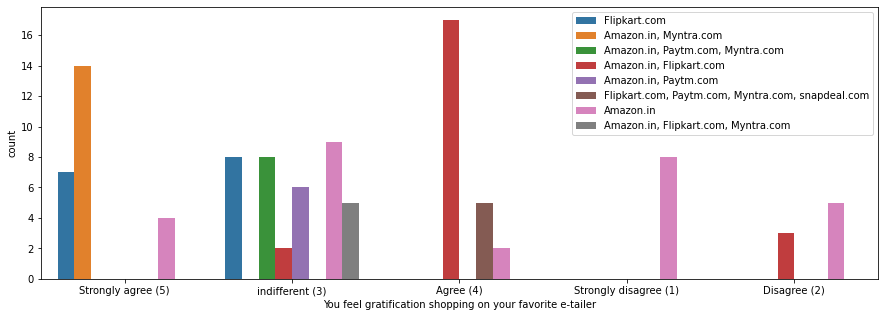

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(df['You feel gratification shopping on your favorite e-tailer'],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
plt.legend(loc='upper right')

we can observe that most of the ratings are for flipkart and amzon related.

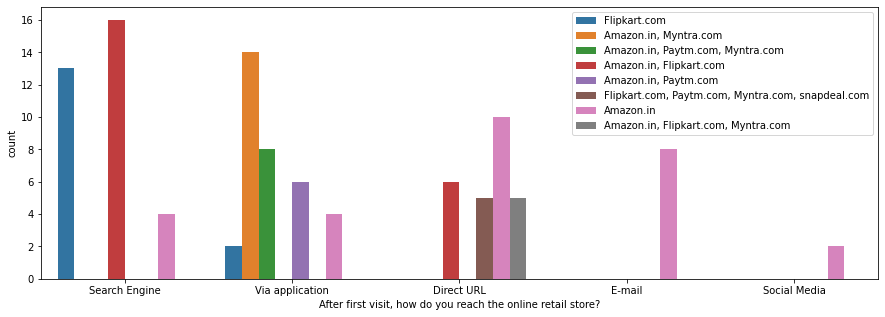

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(df['After first visit, how do you reach the online retail store?'],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
plt.legend(loc='upper right')

Text(0.5, 1.0, "Customer's view")

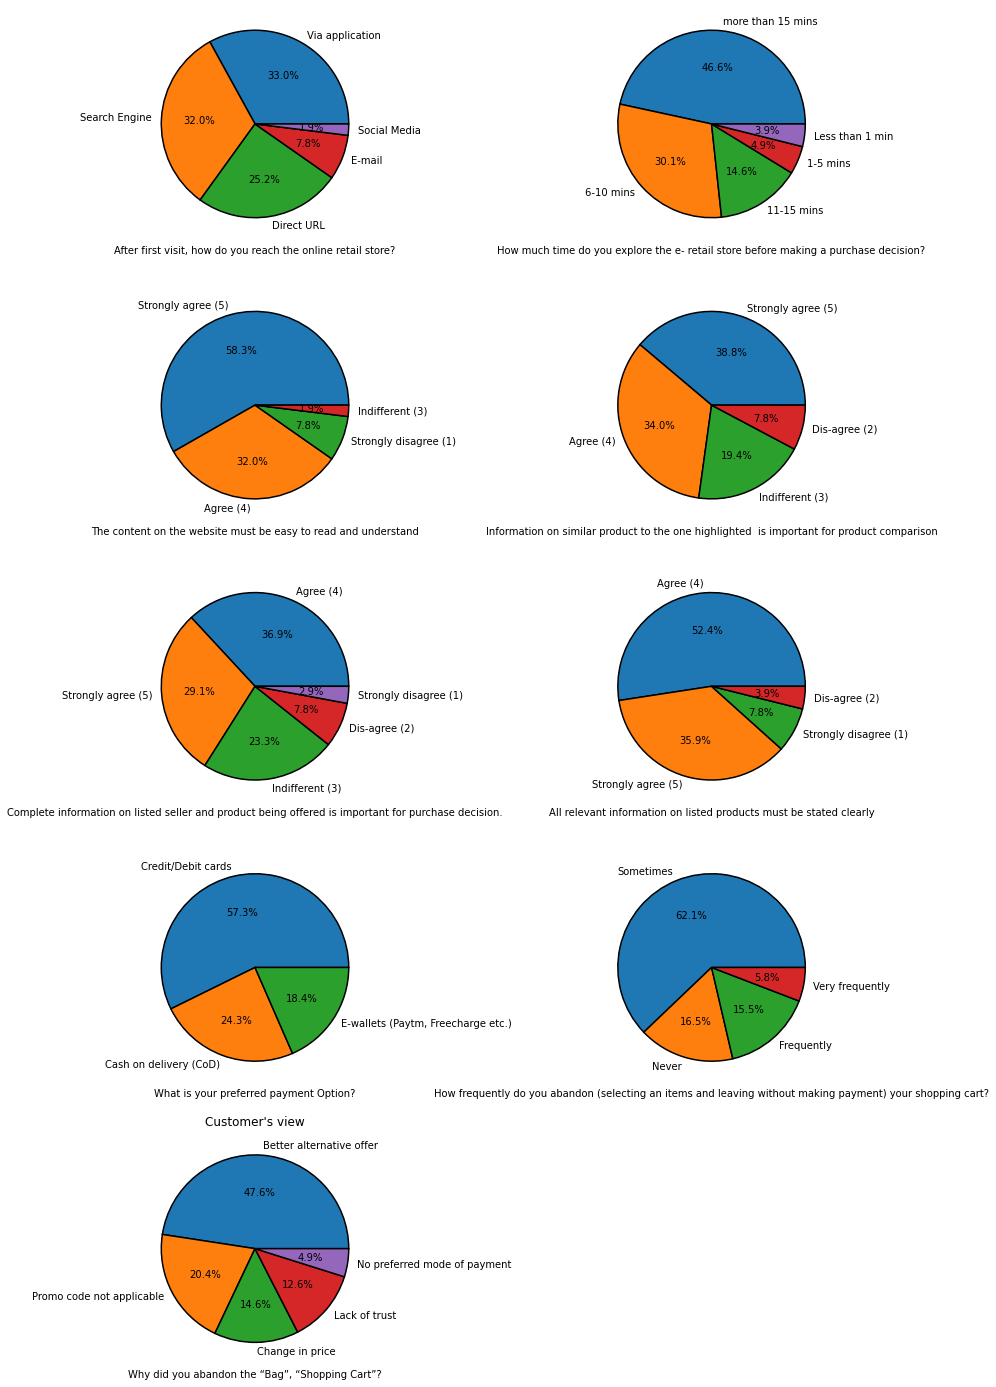

In [26]:
li=['After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
   'The content on the website must be easy to read and understand',
       'Information on similar product to the one highlighted  is important for product comparison',
       'Complete information on listed seller and product being offered is important for purchase decision.',
       'All relevant information on listed products must be stated clearly',
    'What is your preferred payment Option?',
   'How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',
       'Why did you abandon the “Bag”, “Shopping Cart”?',]
c=1
plt.figure(figsize=(15,25))
for i in li:
    plt.subplot(5,2,c)
    df[i].value_counts().plot.pie(autopct='%.1f%%', wedgeprops={"edgecolor" : "black",'linewidth':1.5})
    plt.xlabel(i)
    plt.ylabel("")
    c+=1
plt.title("Customer's view")

Less than 10% of users seems to get influenced by social media or E-mails to get back to shopping after first time.

Huge percentage of customer's want the website to be easy to understand, similar product comparision, complete information and all the specifications or information about the products.

Even if people spend 10 mins to 15 mins or even more to explore the product, 47.6% of the people sometimes abandon the cart as the better alternative offers are available. so, offer do play an important role for customer to buy the product

people mostly abandon the cart because of the Better alternative offer they get or if promo code is not applicable.

Text(0.5, 1.0, 'E-commerce platform service')

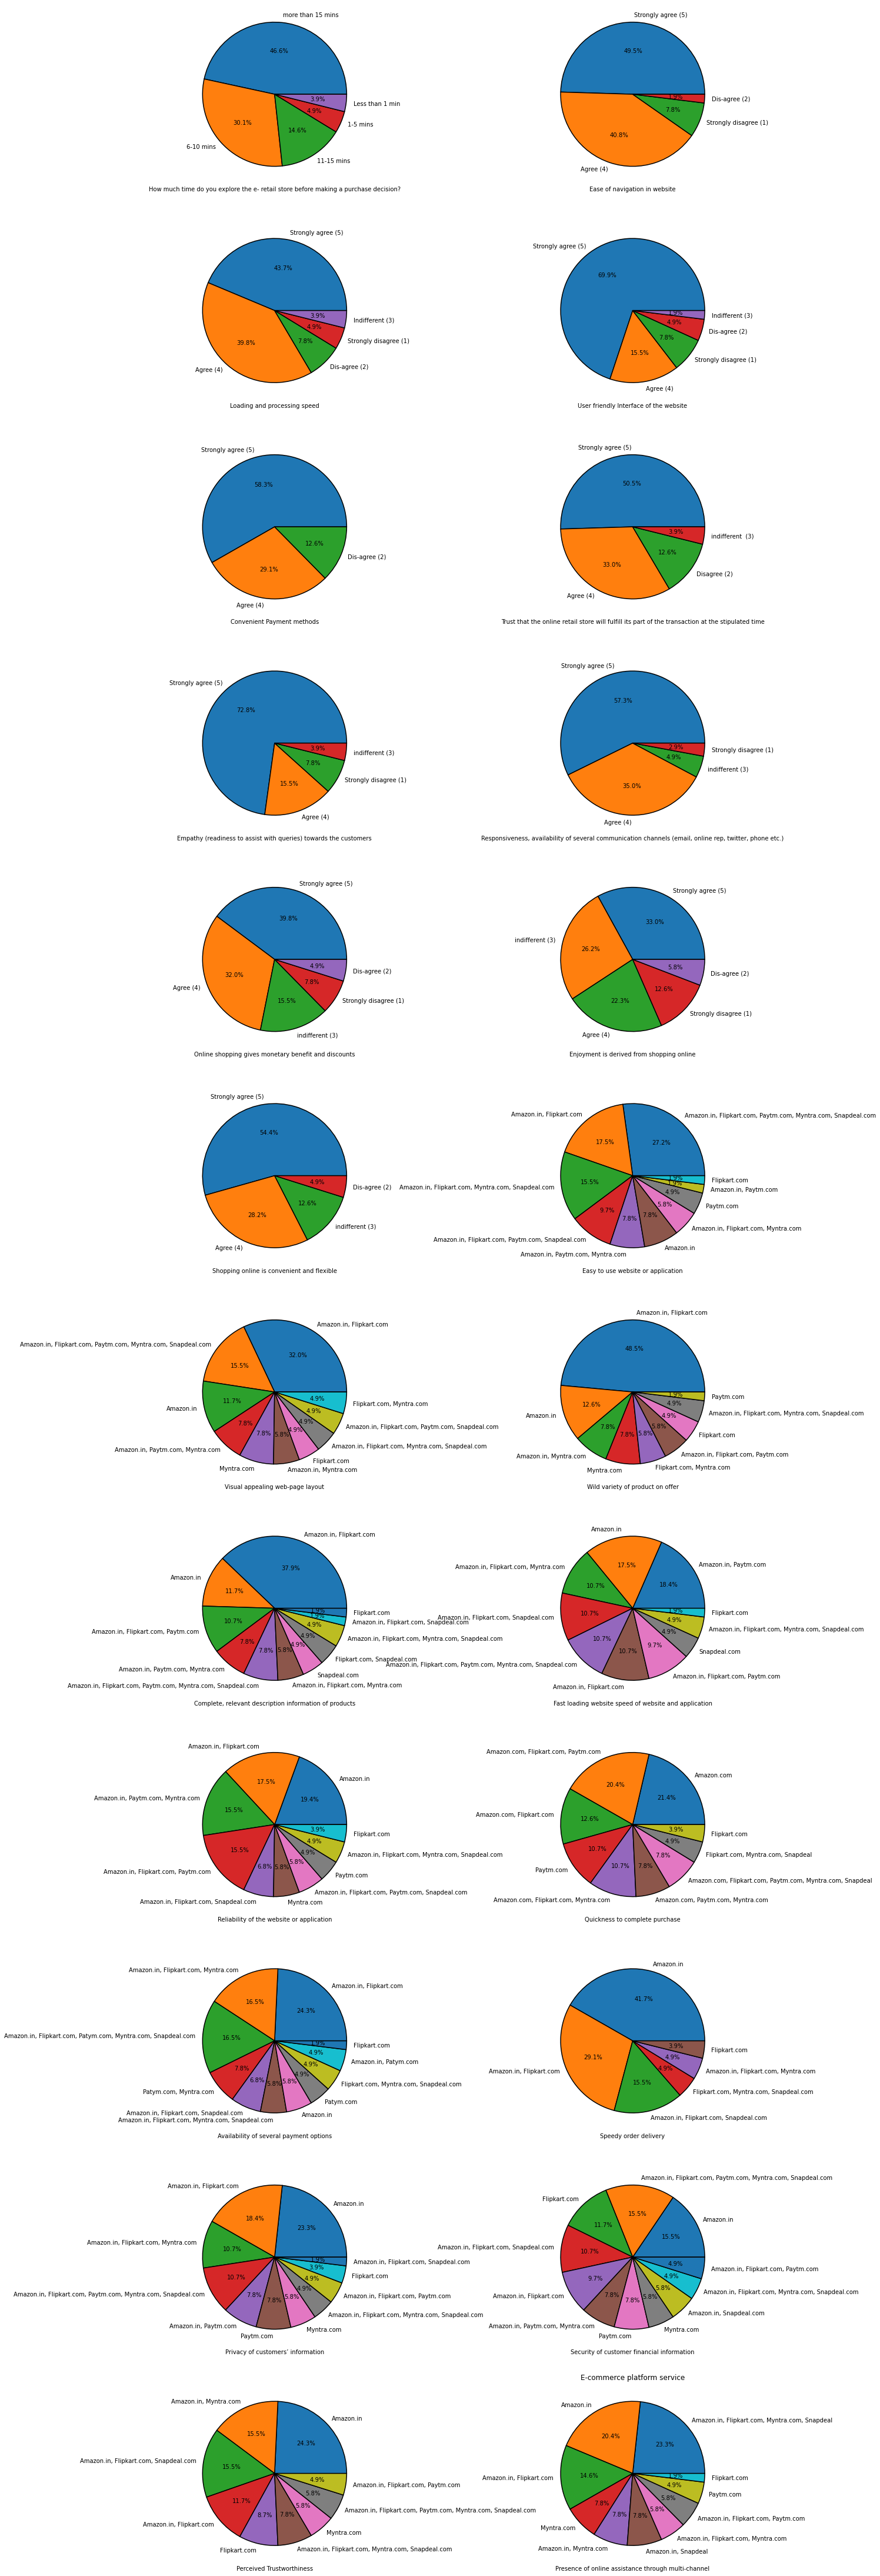

In [27]:
#services by the plaform
li=['How much time do you explore the e- retail store before making a purchase decision?',
    'Ease of navigation in website', 'Loading and processing speed',
       'User friendly Interface of the website',
       'Convenient Payment methods',
       'Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       'Empathy (readiness to assist with queries) towards the customers',
       'Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
       'Online shopping gives monetary benefit and discounts',
       'Enjoyment is derived from shopping online',
       'Shopping online is convenient and flexible',
    'Easy to use website or application',
       'Visual appealing web-page layout',
       'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
   ]
c=1
x=math.ceil(len(li)/2)
plt.figure(figsize=(20,80))
for i in li:
    plt.subplot(x,2,c)
    df[i].value_counts().plot.pie(autopct='%.1f%%', wedgeprops={"edgecolor" : "black",'linewidth':1.5})
    plt.xlabel(i)
    plt.ylabel("")
    c+=1
plt.title("E-commerce platform service")


More than 80% customers wants the website to be user friendly, ease to navigate,
high loading and processing speed.

A very huge customer wants the platform to assist them with the queries and be 
available at different platforms for the same.

From the charts above we can say that people trusts and likes to use the Amazon and Flipkart followed by paytm and snapdeal.

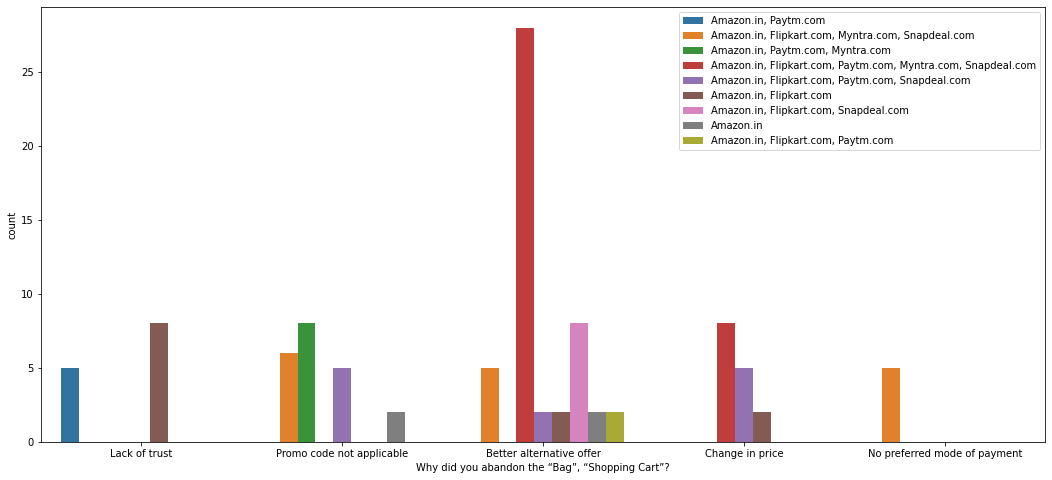

In [28]:
plt.figure(figsize=(18,8))
sns.countplot(df['Why did you abandon the “Bag”, “Shopping Cart”?'],
              hue=df['From the following, tick any (or all) of the online retailers you have shopped from;'])
plt.legend(loc='upper right')

Here, we can see that people mostly abandon there cart as they find better alternative offer or prome code not applicable. also they seems to not shop if the price is dynamic. while few have issues of trust or preferred payment mode.

Amazon's customer mostly abandon cart incase of better alternative offer.

In [29]:
df.columns.values

array(['index', 'Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?',
       'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving wi

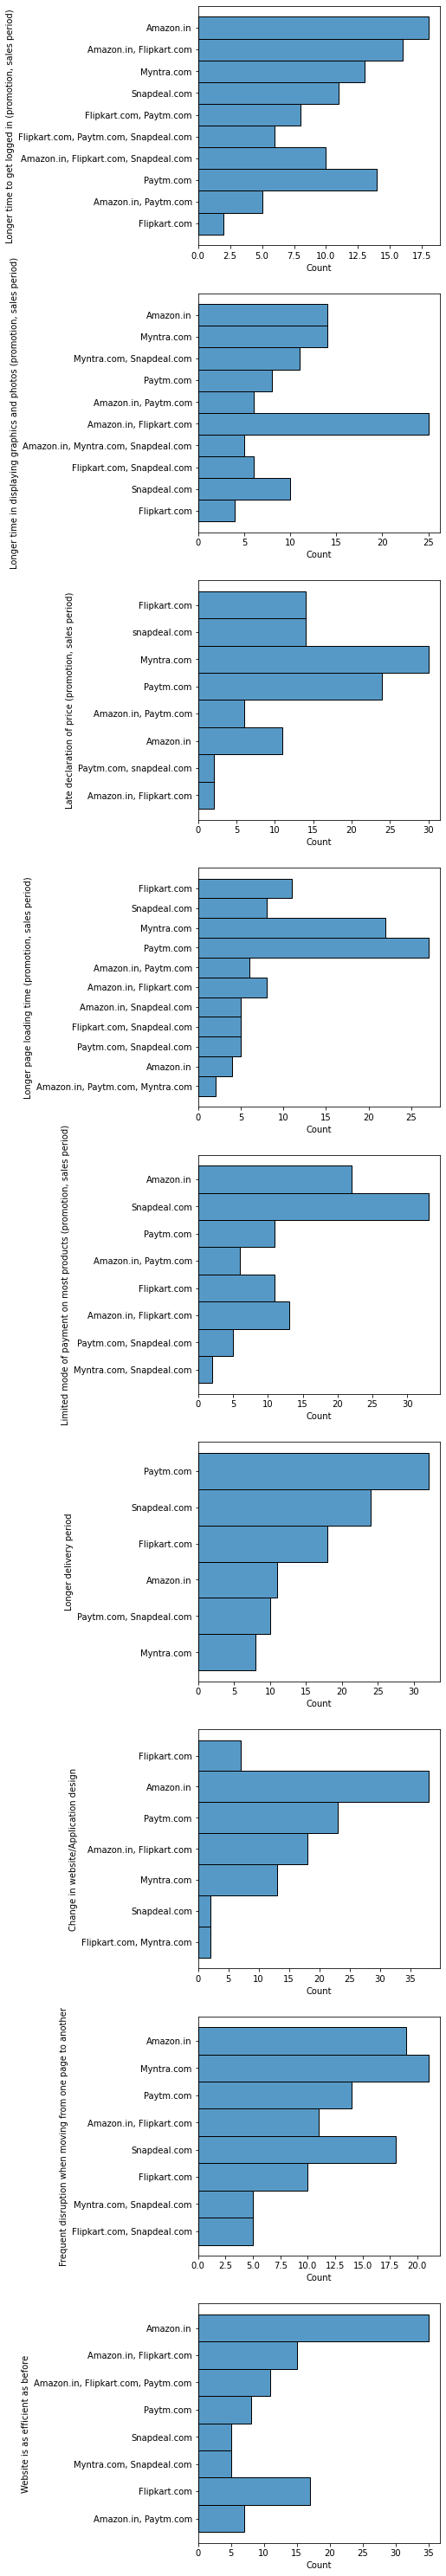

In [30]:
li=['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another',
       'Website is as efficient as before']
c=1
plt.figure(figsize=(5,60))
for i in li:
    plt.subplot(10,1,c)
    sns.histplot(y=df[i])
    c+=1

<AxesSubplot:xlabel='Which of the Indian online retailer would you recommend to a friend?', ylabel='count'>

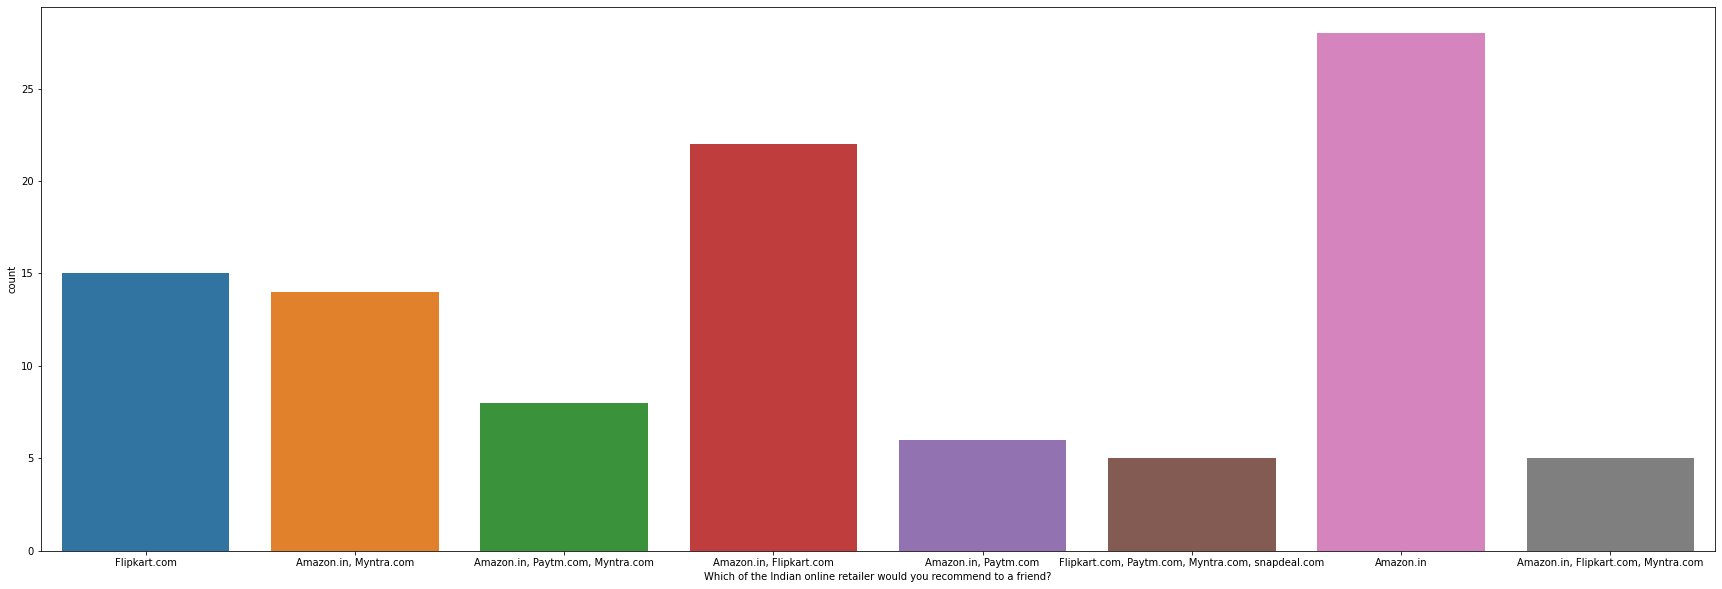

In [31]:
plt.figure(figsize=(30,10))
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'])

Here, from the above graphs, we can see that though these websites got few negatives, people still like to recommend Amazon and flipkart to their friends.